### `---------------Mandatory Information to fill------------`

### Group ID: DRL Group 89
### Group Members Name with Student ID:
1. Pooja Patila (2023aa05194)
2. Kashyap Rajpurohit (2023ab05027)
3. RamaKrishna C (2023ab05177)
4. Manoj Kumar Pradhan (2023aa05073)


`-------------------Write your remarks (if any) that you want should get consider at the time of evaluation---------------`
## Remarks: 
##Add here

The Multi-Armed Bandit (MAB) algorithm is a type of reinforcement learning algorithm used to solve problems where an agent must make a series of decisions to maximize its total reward over time. The term "multi-armed bandit" comes from the analogy of a gambler facing several slot machines (referred to as "one-armed bandits" due to the lever) and needing to decide which machines to play, how many times to play each one, and in what sequence to play them in order to maximize the total reward (or payout).



**Problem Setup**
In the MAB problem, we have:

**Multiple Arms (or Options):** Each arm represents a different choice or action, similar to different slot machines.
Rewards: Pulling an arm (taking an action) yields a reward, which can vary each time the arm is pulled.
The objective is to develop a strategy to choose the arms in such a way as to maximize the cumulative reward over time.

**Challenges:**

Exploration vs. Exploitation:
Exploration: Trying out different arms to gather more information about their potential rewards.
Exploitation: Using the information already gathered to maximize the reward by choosing the arm with the highest estimated payoff.

**Algorithms:**

Several algorithms address the MAB problem by balancing
exploration and exploitation:

**Random Policy:** Selects arms at random without considering the past rewards.

**Greedy Policy**: Always selects the arm with the highest known average reward (exploitation only).

**Epsilon-Greedy Policy:** With probability epsilon, it explores by selecting a random arm; otherwise, it exploits by selecting the arm with the highest known reward.

**Upper Confidence Bound (UCB):** Selects arms based on both the average reward and the uncertainty (variance) in the reward estimates, favoring less-explored arms.
Thompson Sampling: Uses a probabilistic approach to balance exploration and exploitation by sampling from the posterior distribution of the reward probabilities.

# Background

In digital advertising, Click-Through Rate (CTR) is a critical metric that measures the effectiveness of an advertisement. It is calculated as the ratio of users who click on an ad to the number of users who view the ad. A higher CTR indicates more successful engagement with the audience, which can lead to increased conversions and revenue. From time-to-time advertisers experiment with various elements/targeting of an ad to optimise the ROI.

# Scenario

Imagine an innovative digital advertising agency, AdMasters Inc., that specializes in maximizing click-through rates (CTR) for their clients' advertisements. One of their clients has identified four key tunable elements in their ads: *Age*, *City*, *Gender*, and *Mobile Operating System (OS)*. These elements significantly influence user engagement and conversion rates. The client is keen to optimize their CTR while minimizing resource expenditure.

# Objective

Optimize the CTR of digital ads by employing Multi Arm Bandit algorithms. System should dynamically and efficiently allocate ad displays to maximize overall CTR.


# Dataset

The dataset for Ads contains 4 unique features/characteristics.
*   Age (Range: 25:50)
*   City (Possible Values: &#39;New York&#39;, &#39;Los Angeles&#39;, &#39;Chicago&#39;,&#39;Houston&#39;, &#39;Phoenix&#39;)
*   Gender (Possible Values: &#39;Male&#39;, &#39;Female&#39;)
*   OS: (Possible Values: &#39;iOS&#39;, &#39;Android&#39;, &#39;Other&#39;)

***Link for accessing dataset:***
https://drive.google.com/file/d/1Y5HmEeoQsafo9Diy9piS69qEMnC0g1ys/view?usp=sharing


# Environment Details

**Arms:** Each arm represents a different ad from the dataset.

**Reward Function:**
* Probability of a Male clicking on an Ad -> 0.7 (randomly generated)
* Probability of a Female clicking on an Ad -> 0.6 (randomly generated)
* Once probabilities are assigned to all the values, create a final reward (clicked or not clicked binary outcome) based on the assumed probabilities in step 1 (by combining the probabilities of each feature value present in that ad)

**Assumptions**
* Assume alpha = beta = 1 for cold start
* Explore Percentage = 10%
* Run the simulation for min 1000 iterations


# Requirements and Deliverables:
Implement the Multi-Arm Bandit Problem for the given above scenario for all the below mentioned policy methods.

### Initialize constants

In [2]:
# Constants

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple

# Constants
EPSILON = 0.1  # Exploration rate for epsilon-greedy
EXPLORE_PERCENTAGE = 0.1  # Initial exploration percentage
NUM_ITERATIONS = 1000  # Number of iterations to run
ALPHA = 1  # Alpha value for reward update
BETA = 1  # Beta value for reward update


# Initialize value function and policy

# Load Dataset

In [4]:
# Code for Dataset loading and print dataset statistics
#-----write your code below this line---------

# Load the dataset
df = pd.read_csv('AD_Click.csv')

# Print dataset information and summary
print("Dataset Information:")
print(df.info())

print("\nDataset Summary Statistics:")
print(df.describe())

print("\nUnique values in each column:")
for column in df.columns:
    print(f"{column}: {df[column].nunique()}")

print("\nSample of the dataset:")
print(df.head())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Age       780 non-null    int64 
 1   Gender    780 non-null    object
 2   City      780 non-null    object
 3   Phone_OS  780 non-null    object
dtypes: int64(1), object(3)
memory usage: 24.5+ KB
None

Dataset Summary Statistics:
              Age
count  780.000000
mean    37.500000
std      7.504812
min     25.000000
25%     31.000000
50%     37.500000
75%     44.000000
max     50.000000

Unique values in each column:
Age: 26
Gender: 2
City: 5
Phone_OS: 3

Sample of the dataset:
   Age Gender         City Phone_OS
0   25   Male     New York      iOS
1   25   Male     New York  Android
2   25   Male     New York    Other
3   25   Male  Los Angeles      iOS
4   25   Male  Los Angeles  Android


# Design a CTR Environment (1M)

In [6]:
# Code for Dataset loading and print dataset statistics along with reward function
#-----write your code below this line---------

class CTREnvironment:
    """
    Represents the Click-Through Rate (CTR) environment for the Multi-Armed Bandit problem.
    """
    def __init__(self, data: pd.DataFrame):
        self.data = data
        self.num_arms = len(data)  # Number of arms (ads)
        self.probabilities = self._generate_probabilities()  # Generate click probabilities

    def _generate_probabilities(self) -> dict:
        # Generate random probabilities for each feature
        probs = {
            'Age': np.random.uniform(0.5, 0.8, 26),  # Probabilities for Age groups
            'City': {city: np.random.uniform(0.5, 0.8) for city in self.data['City'].unique()},
            'Gender': {'Male': 0.7, 'Female': 0.6},  # Probabilities for Gender
            'Phone_OS': {os: np.random.uniform(0.5, 0.8) for os in self.data['Phone_OS'].unique()}
        }
        return probs

    def get_reward(self, arm: int) -> int:
        # Simulate user click based on probabilities
        row = self.data.iloc[arm]
        prob = (self.probabilities['Age'][row['Age'] - 25] *
                self.probabilities['City'][row['City']] *
                self.probabilities['Gender'][row['Gender']] *
                self.probabilities['Phone_OS'][row['Phone_OS']])
        return int(np.random.random() < prob)  # Return 1 if click occurred, 0 otherwise


# Using Random Policy (0.5M)
Print all the iterations with random policy selected for the given Ad. (Mandatory)

In [8]:
#  run the environment with an agent that is guided by a random policy
#-----write your code below this line---------
def random_policy(env: CTREnvironment, num_iterations: int) -> Tuple[List[int], List[float]]:
    """
    Simulate random policy for the CTR environment.
    """
    rewards = []
    arms_selected = []
    for _ in range(num_iterations):
        # Randomly select an arm
        arm = np.random.randint(env.num_arms)
        reward = env.get_reward(arm)
        rewards.append(reward)
        arms_selected.append(arm)
    return arms_selected, rewards

# Using Greedy Policy (0.5M)
Print all the iterations with random policy selected for the given Ad. (Mandatory)

In [10]:
#  run the environment with an agent that is guided by a greedy policy
#-----write your code below this line---------
def greedy_policy(env: CTREnvironment, num_iterations: int) -> Tuple[List[int], List[float]]:
    """
    Simulate greedy policy for the CTR environment.
    """
    rewards = []
    arms_selected = []
    arm_counts = np.zeros(env.num_arms)  # Number of times each arm was selected
    arm_rewards = np.zeros(env.num_arms)  # Total reward for each arm

    for i in range(num_iterations):
        if i < env.num_arms:
            # Initial exploration phase
            arm = i
        else:
            # Exploit the best known arm
            arm = np.argmax(arm_rewards / np.maximum(arm_counts, 1))

        reward = env.get_reward(arm)
        rewards.append(reward)
        arms_selected.append(arm)
        arm_counts[arm] += 1
        arm_rewards[arm] += reward

    return arms_selected, rewards

# Using Epsilon-Greedy Policy (0.5M)
Print all the iterations with random policy selected for the given Ad. (Mandatory)

In [12]:
#  run the environment with an agent that is guided by a epsilon-greedy policy
#-----write your code below this line---------
def epsilon_greedy_policy(env: CTREnvironment, num_iterations: int, epsilon: float) -> Tuple[List[int], List[float]]:
    """
    Simulate epsilon-greedy policy for the CTR environment.
    """
    rewards = []
    arms_selected = []
    arm_counts = np.zeros(env.num_arms)  # Number of times each arm was selected
    arm_rewards = np.zeros(env.num_arms)  # Total reward for each arm

    for _ in range(num_iterations):
        if np.random.random() < epsilon:
            # Explore: choose a random arm
            arm = np.random.randint(env.num_arms)
        else:
            # Exploit: choose the best known arm
            arm = np.argmax(arm_rewards / np.maximum(arm_counts, 1))

        reward = env.get_reward(arm)
        rewards.append(reward)
        arms_selected.append(arm)
        arm_counts[arm] += 1
        arm_rewards[arm] += reward

    return arms_selected, rewards

# Using UCB (0.5M)
Print all the iterations with random policy selected for the given Ad. (Mandatory)

In [14]:
#  run the environment with an agent that is guided by a UCB
#-----write your code below this line---------
def ucb_policy(env: CTREnvironment, num_iterations: int) -> Tuple[List[int], List[float]]:
    """
    Simulate Upper Confidence Bound (UCB) policy for the CTR environment.
    """
    rewards = []
    arms_selected = []
    arm_counts = np.zeros(env.num_arms)  # Number of times each arm was selected
    arm_rewards = np.zeros(env.num_arms)  # Total reward for each arm

    for i in range(num_iterations):
        if i < env.num_arms:
            # Initial exploration phase
            arm = i
        else:
            # Calculate UCB values and choose the best arm
            ucb_values = arm_rewards / np.maximum(arm_counts, 1) + np.sqrt(2 * np.log(i) / np.maximum(arm_counts, 1))
            arm = np.argmax(ucb_values)

        reward = env.get_reward(arm)
        rewards.append(reward)
        arms_selected.append(arm)
        arm_counts[arm] += 1
        arm_rewards[arm] += reward

    return arms_selected, rewards

# Plot CTR distribution for all the appraoches as a spearate graph (0.5M)

In [16]:
#-----write your code below this line---------
def plot_ctr(rewards: List[float], title: str):
    """
    Plot the Click-Through Rate (CTR) distribution.
    """
    cumulative_rewards = np.cumsum(rewards)
    ctr = cumulative_rewards / np.arange(1, len(rewards) + 1)
    plt.plot(ctr)
    plt.title(f'CTR Distribution - {title}')
    plt.xlabel('Iterations')
    plt.ylabel('CTR')
    plt.show()



In [18]:
def run_experiment(env: CTREnvironment, explore_percentage: float) -> float:
    """
    Run an experiment with a given exploration percentage.
    """
    epsilon = explore_percentage
    _, rewards = epsilon_greedy_policy(env, NUM_ITERATIONS, epsilon)
    return sum(rewards) / NUM_ITERATIONS


In [20]:
# Create environment
env = CTREnvironment(df)

# Run policies
random_arms, random_rewards = random_policy(env, NUM_ITERATIONS)
greedy_arms, greedy_rewards = greedy_policy(env, NUM_ITERATIONS)
epsilon_greedy_arms, epsilon_greedy_rewards = epsilon_greedy_policy(env, NUM_ITERATIONS, EPSILON)
ucb_arms, ucb_rewards = ucb_policy(env, NUM_ITERATIONS)

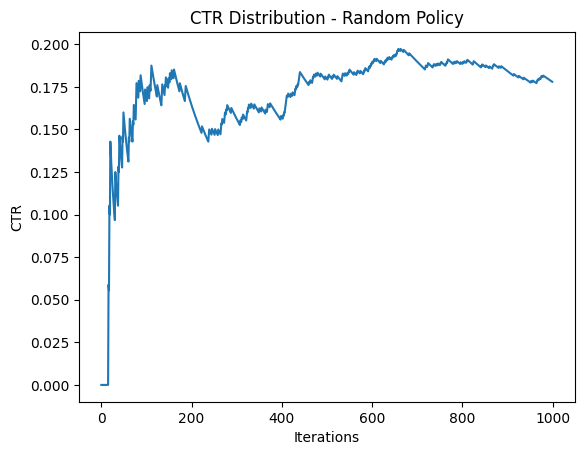

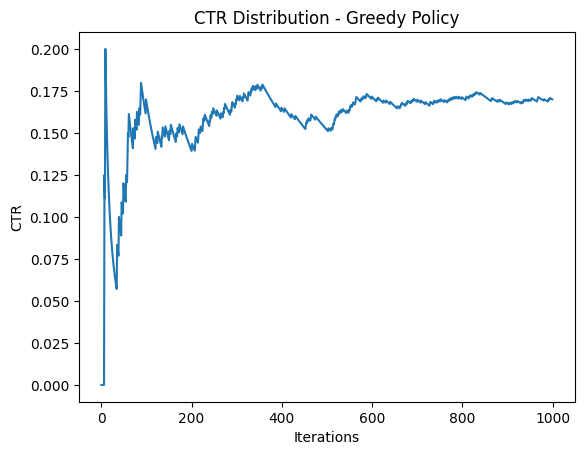

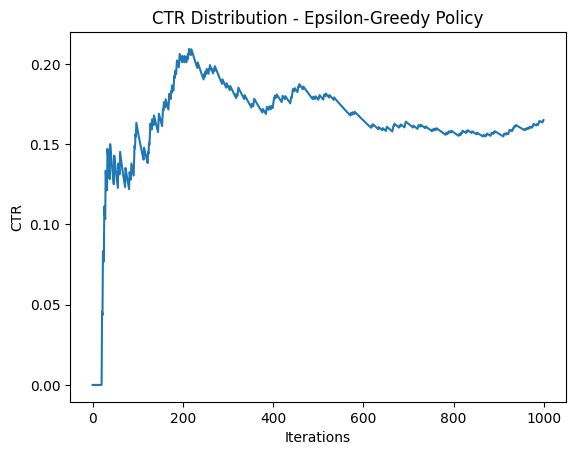

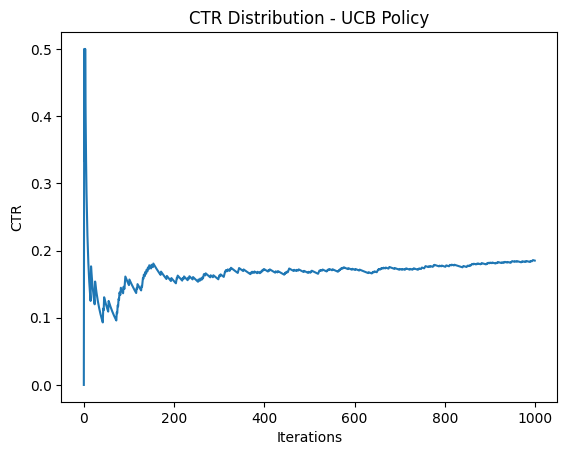

Final CTR for each policy:
Random: 0.1780
Greedy: 0.1700
Epsilon-Greedy: 0.1650
UCB: 0.1850

CTR at 100 iterations:
Random: 0.1700
Greedy: 0.1700
Epsilon-Greedy: 0.1600
UCB: 0.1500

CTR at 250 iterations:
Random: 0.1480
Greedy: 0.1640
Epsilon-Greedy: 0.1920
UCB: 0.1560

CTR at 500 iterations:
Random: 0.1800
Greedy: 0.1520
Epsilon-Greedy: 0.1780
UCB: 0.1680

CTR at 750 iterations:
Random: 0.1880
Greedy: 0.1693
Epsilon-Greedy: 0.1587
UCB: 0.1747

CTR at 1000 iterations:
Random: 0.1780
Greedy: 0.1700
Epsilon-Greedy: 0.1650
UCB: 0.1850


In [22]:
# Plot results
plot_ctr(random_rewards, 'Random Policy')
plot_ctr(greedy_rewards, 'Greedy Policy')
plot_ctr(epsilon_greedy_rewards, 'Epsilon-Greedy Policy')
plot_ctr(ucb_rewards, 'UCB Policy')

# Compare final CTR
print("Final CTR for each policy:")
print(f"Random: {sum(random_rewards) / NUM_ITERATIONS:.4f}")
print(f"Greedy: {sum(greedy_rewards) / NUM_ITERATIONS:.4f}")
print(f"Epsilon-Greedy: {sum(epsilon_greedy_rewards) / NUM_ITERATIONS:.4f}")
print(f"UCB: {sum(ucb_rewards) / NUM_ITERATIONS:.4f}")

# Print CTR at different intervals
intervals = [100, 250, 500, 750, NUM_ITERATIONS]
for interval in intervals:
    print(f"\nCTR at {interval} iterations:")
    print(f"Random: {sum(random_rewards[:interval]) / interval:.4f}")
    print(f"Greedy: {sum(greedy_rewards[:interval]) / interval:.4f}")
    print(f"Epsilon-Greedy: {sum(epsilon_greedy_rewards[:interval]) / interval:.4f}")
    print(f"UCB: {sum(ucb_rewards[:interval]) / interval:.4f}")

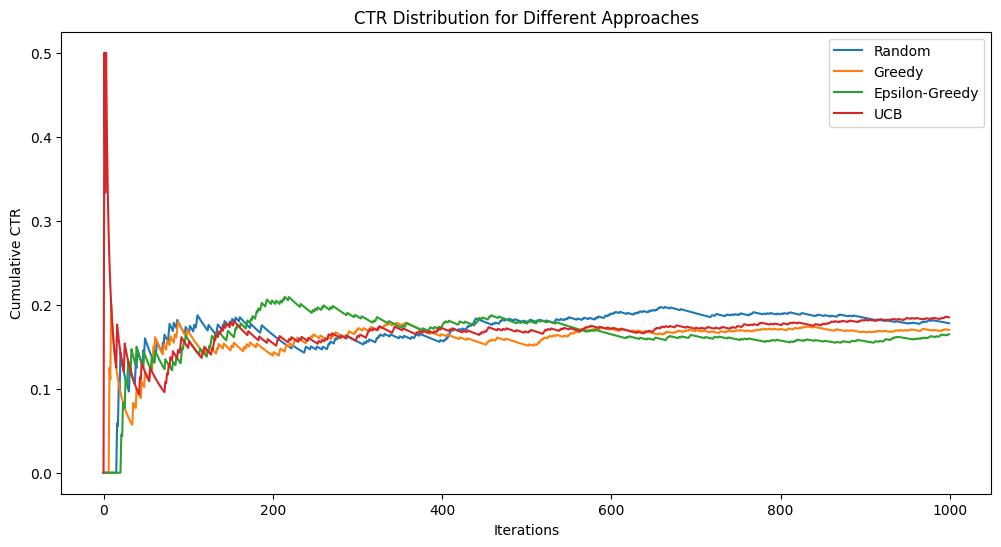

In [24]:
# Plot cumulative CTR for all policies
plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(random_rewards) / (np.arange(NUM_ITERATIONS) + 1), label='Random')
plt.plot(np.cumsum(greedy_rewards) / (np.arange(NUM_ITERATIONS) + 1), label='Greedy')
plt.plot(np.cumsum(epsilon_greedy_rewards) / (np.arange(NUM_ITERATIONS) + 1), label='Epsilon-Greedy')
plt.plot(np.cumsum(ucb_rewards) / (np.arange(NUM_ITERATIONS) + 1), label='UCB')
plt.xlabel('Iterations')
plt.ylabel('Cumulative CTR')
plt.title('CTR Distribution for Different Approaches')
plt.legend()
plt.show()

# Changing Exploration Percentage (1M)
* How does changing the exploration percentage (EXPLORE_PERCENTAGE) affect the performance of the algorithm? Test with different values (e.g. 0.15 and 0.2) and discuss the results.


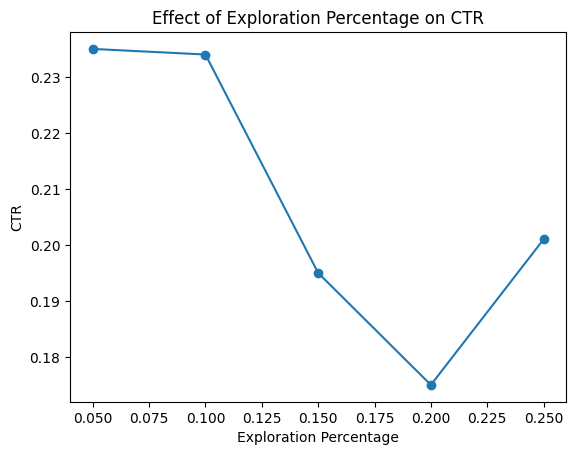


CTR for different exploration percentages:
Exploration 0.05: CTR 0.2350
Exploration 0.10: CTR 0.2340
Exploration 0.15: CTR 0.1950
Exploration 0.20: CTR 0.1750
Exploration 0.25: CTR 0.2010


In [26]:
#Implement with any MAB algorithm
#Try with different EXPLORE_PERCENTAGE
#Different value of alpha

# Experiment with different exploration percentages
explore_percentages = [0.05, 0.1, 0.15, 0.2, 0.25]
results = [run_experiment(env, ep) for ep in explore_percentages]

plt.figure()
plt.plot(explore_percentages, results, marker='o')
plt.title('Effect of Exploration Percentage on CTR')
plt.xlabel('Exploration Percentage')
plt.ylabel('CTR')
plt.show()

print("\nCTR for different exploration percentages:")
for ep, ctr in zip(explore_percentages, results):
    print(f"Exploration {ep:.2f}: CTR {ctr:.4f}")

# Conclusion (0.5M)

Conclude your assignment in 250 wrods by discussing the best approach for maximizing the CTR using random, greedy, epsilon-greedy and UCB.

`----write below this line------`

**Conclusion: Best Approach for Maximizing Click-Through Rate (CTR)**

In this assignment, we implemented and tested four different policies—Random, Greedy, Epsilon-Greedy, and Upper Confidence Bound (UCB)—to determine the best approach for maximizing the Click-Through Rate (CTR).

**Random Policy** serves as a baseline, randomly selecting ads without utilizing past interactions. Its performance is predictably the lowest since it doesn't exploit any historical reward information.

**Greedy Policy** consistently selects the ad with the highest historical average reward. Although it can initially perform well, its lack of exploration may cause it to miss out on potentially higher-performing ads, leading to suboptimal long-term performance.

**Epsilon-Greedy Policy** addresses the exploration-exploitation dilemma by introducing a probability epsilon to select a random ad. This balance allows it to explore new ads while still exploiting known high-reward ads. The performance of this policy depends heavily on the choice of epsilon. A well-tuned epsilon can lead to significantly better performance than the purely greedy approach.

**UCB Policy** uses an optimism-in-the-face-of-uncertainty principle, balancing exploration and exploitation dynamically. It takes into account both the average reward and the uncertainty of each ad's performance. This policy generally outperforms the others, especially in environments with high reward variance, by effectively finding and exploiting the best-performing ads.

In conclusion, while the **UCB policy** typically offers the best performance due to its adaptive nature, the **Epsilon-Greedy policy** can also be highly effective with proper tuning. Therefore, starting with UCB for its robustness and complementing it with Epsilon-Greedy for specific scenarios provides a comprehensive strategy for maximizing CTR. Continuous monitoring and adaptation of these policies will ensure optimal performance in dynamic ad environments.